/tmp/ipython-input-1-3334651879.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-1-3334651879.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] = df['furnishingstatus'].replace({


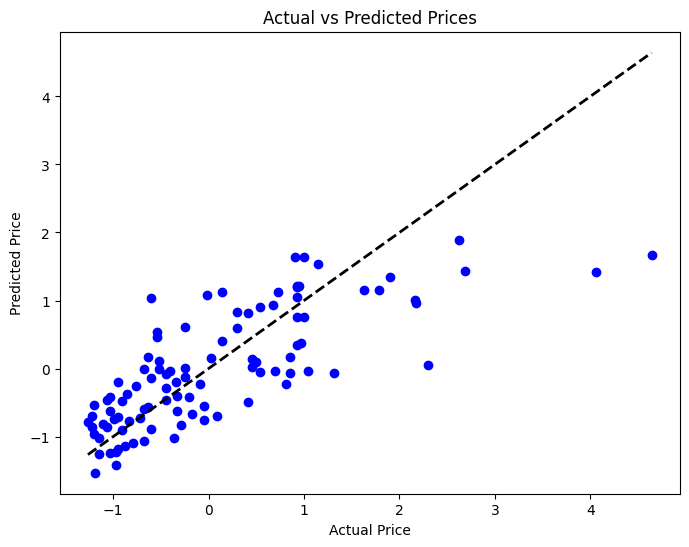

In [1]:
# 1. Import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 2. Load data
df = pd.read_csv('Housing.csv')

# 3. Clean & encode
columns_to_transform = ['mainroad', 'guestroom', 'basement','hotwaterheating','airconditioning', 'prefarea']
for col in columns_to_transform:
    df[col] = df[col].replace({'yes': 1, 'no': 0})

df['furnishingstatus'] = df['furnishingstatus'].replace({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})

# 4. Standardize
sc = ['price', 'area']
scaler = StandardScaler()
df[sc] = scaler.fit_transform(df[sc])

# 5. Prepare input and output
X = df.drop('price', axis=1)
y = df['price']

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [2]:
from google.colab import files
uploaded = files.upload()

# Load new input data from CSV
new_data = pd.read_csv('new_house.csv')  # <---- Make sure this file is uploaded

# Encode categorical columns
columns_to_transform = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in columns_to_transform:
    new_data[col] = new_data[col].replace({'yes': 1, 'no': 0})

new_data['furnishingstatus'] = new_data['furnishingstatus'].replace({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})

# Scale only 'area' (price is missing in new data, so insert dummy 0 for scaling)
new_data[['area']] = scaler.transform([[0, val] for val in new_data['area']])[:, 1:]

# Predict using trained model
new_predictions = lr_model.predict(new_data)

# OPTIONAL: Convert predicted prices from scaled back to original
dummy_df = pd.DataFrame({'price': new_predictions, 'area': new_data['area']})
original_scale = scaler.inverse_transform(dummy_df)
actual_prices = original_scale[:, 0]  # First column is 'price'

# Display predictions
new_data['Predicted Price (actual)'] = actual_prices
new_data[['area', 'bedrooms', 'bathrooms', 'Predicted Price (actual)']]


Saving new_house.csv to new_house (2).csv


/tmp/ipython-input-2-3085248095.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data[col] = new_data[col].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-2-3085248095.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data['furnishingstatus'] = new_data['furnishingstatus'].replace({
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,area,bedrooms,bathrooms,Predicted Price (actual)
0,-0.774152,3,3,5.393117e+06
1,-1.155680,3,1,2.736661e+06
2,-1.325759,3,1,2.174373e+06
3,-0.843103,2,1,3.328261e+06
4,-0.604073,3,1,3.231703e+06
5,-0.978706,2,1,3.498282e+06
6,-0.604073,3,1,4.141715e+06
7,-1.105116,2,1,2.222765e+06
8,-0.787942,2,1,2.858137e+06
9,-0.420204,2,1,3.040848e+06
